# Breadth-first search (BFS) 

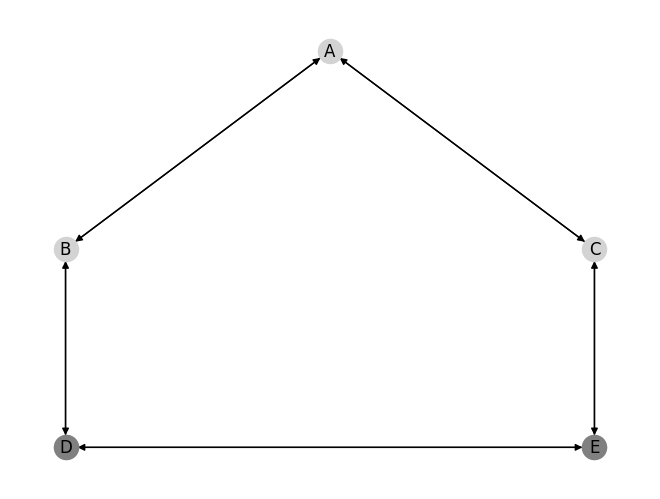

In [1]:
import networkx as nx
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','D'],'C':['A','E'],'D':['B','E'],'E':['C','D']}
source='A'
Target=['D','E']
nxG=nx.DiGraph(G)
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
#pos_nodes = nx.nx_agraph.pygraphviz_layout(nxG,prog='dot',root=source)
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray")
nx.draw_networkx_nodes(G,pos=pos_nodes, nodelist=Target, node_color='gray')


## BFS algorithm
BFS(G,source)  
> Open = Queue(source)  
> Closed = $\emptyset$  
> while Open $\neq \emptyset$
>> s = Unqueue(Open)  
>> Closed = Closed $\cup$ $\{s\}$  
>> for n $\in$ Adjacents(G,s)  
>>> if n $\notin$ Closed  
>>>> if n $\notin$ Open  
>>>>> if Target(n) return n  
>>>>> Append(Open,n)  
> return NULL

### BFS implementation returning the path from the source to the target node

In [2]:
def path2source(source, target, Closed):
  path = [target]
  node = source
  while node != None:
    path.insert(0,node)
    node = Closed[node]
  return path

def bfs(G, source, Target):
  if source in Target: 
    path = [source]; return path
  # Open is a list of nodes to be visited. FIFO list of tuples (node, parent)
  Open = []; Open.append((source,None))
  # Closed is a list of visited nodes.  Hash table of key: node and value: parent
  Closed = {}; 
	
  while Open != []:
    (s,parent) = Open.pop(0)
    Closed.update({s:parent})
    for n in G[s]:
      if n not in Closed:
        if n not in [n for (n,p) in Open]:
          if n in Target: 
            return path2source(s, n, Closed)
          Open.append((n,s))
				
				
print(bfs(G,source,Target))


['A', 'B', 'D']
